# Homework 1

## 1) exploratory analysis

In [1]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Manipulate DataFrames

In [2]:
#input our data
flights = pd.read_csv("flights.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#download airline data from Kaggle
airlines = pd.read_csv("airlines.csv")
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [4]:
#download airports data from Kaggle
airports = pd.read_csv("airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


How many observations are there? How many features are there?

In [5]:
#number of rows
flights.count()
#len(flights.index)

YEAR                   5821
MONTH                  5821
DAY                    5821
DAY_OF_WEEK            5821
AIRLINE                5821
FLIGHT_NUMBER          5821
TAIL_NUMBER            5805
ORIGIN_AIRPORT         5821
DESTINATION_AIRPORT    5821
SCHEDULED_DEPARTURE    5821
DEPARTURE_TIME         5730
DEPARTURE_DELAY        5730
TAXI_OUT               5728
WHEELS_OFF             5728
SCHEDULED_TIME         5821
ELAPSED_TIME           5713
AIR_TIME               5713
DISTANCE               5821
WHEELS_ON              5727
TAXI_IN                5727
SCHEDULED_ARRIVAL      5821
ARRIVAL_TIME           5727
ARRIVAL_DELAY          5713
DIVERTED               5821
CANCELLED              5821
CANCELLATION_REASON      93
AIR_SYSTEM_DELAY       1072
SECURITY_DELAY         1072
AIRLINE_DELAY          1072
LATE_AIRCRAFT_DELAY    1072
WEATHER_DELAY          1072
dtype: int64

In [6]:
#number of columns
len(flights.columns)

31

How many different airlines are there? What are their counts?

In [7]:
#group by airlines
airlines=flights.groupby(["AIRLINE"]).count()
len(airlines.index)

14

In [8]:
#counts of airlines
airlines

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AA,722,722,722,722,722,719,722,722,722,712,...,711,710,722,722,11,143,143,143,143,143
AS,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,0,20,20,20,20,20
B6,263,263,263,263,263,263,263,263,263,257,...,257,257,263,263,6,63,63,63,63,63
DL,922,922,922,922,922,922,922,922,922,919,...,918,918,922,922,3,122,122,122,122,122
EV,563,563,563,563,563,562,563,563,563,549,...,549,546,563,563,14,106,106,106,106,106
F9,74,74,74,74,74,73,74,74,74,73,...,73,73,74,74,1,19,19,19,19,19
HA,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,0,12,12,12,12,12
MQ,288,288,288,288,288,288,288,288,288,270,...,270,269,288,288,18,56,56,56,56,56
NK,119,119,119,119,119,119,119,119,119,118,...,118,118,119,119,1,38,38,38,38,38


How many missing values are there in the departure delays? How about arrival delays?
Do they match? Why or why not? Remove these observations afterwards.

In [9]:
#missing values in departure delays
pd.isnull(flights["DEPARTURE_DELAY"]).sum()
#is null to find the missing value, then calculate it

91

In [10]:
#missing values in arrival delays
pd.isnull(flights["ARRIVAL_DELAY"]).sum()

108

They are not match. Maybe different airports use different systems, so the number of missing value may be different.

In [11]:
#remove those missing values
flight1=flights.dropna(subset=["DEPARTURE_DELAY"])
flight1=flights.dropna(subset=["ARRIVAL_DELAY"])
flight1.count()

YEAR                   5713
MONTH                  5713
DAY                    5713
DAY_OF_WEEK            5713
AIRLINE                5713
FLIGHT_NUMBER          5713
TAIL_NUMBER            5713
ORIGIN_AIRPORT         5713
DESTINATION_AIRPORT    5713
SCHEDULED_DEPARTURE    5713
DEPARTURE_TIME         5713
DEPARTURE_DELAY        5713
TAXI_OUT               5713
WHEELS_OFF             5713
SCHEDULED_TIME         5713
ELAPSED_TIME           5713
AIR_TIME               5713
DISTANCE               5713
WHEELS_ON              5713
TAXI_IN                5713
SCHEDULED_ARRIVAL      5713
ARRIVAL_TIME           5713
ARRIVAL_DELAY          5713
DIVERTED               5713
CANCELLED              5713
CANCELLATION_REASON       0
AIR_SYSTEM_DELAY       1072
SECURITY_DELAY         1072
AIRLINE_DELAY          1072
LATE_AIRCRAFT_DELAY    1072
WEATHER_DELAY          1072
dtype: int64

What is the average and median departure and arrival delay? What do you observe?

In [12]:
#calculate the average
flight1["DEPARTURE_DELAY"].mean()

8.886574479257833

In [13]:
flight1["DEPARTURE_DELAY"].median()

-2.0

In [14]:
#calculate the median
flight1["ARRIVAL_DELAY"].mean()

3.9882723612812883

In [15]:
flight1["ARRIVAL_DELAY"].median()

-5.0

When we see the average time of delay, both departure and arrival show positive amount, which means delay. However, when we see the median, it show a negative figure, which means there are more flights not delay than the number of delay flights. 

Display graphically the departure delays and arrival delays for each airline. What do
you notice? Explain.

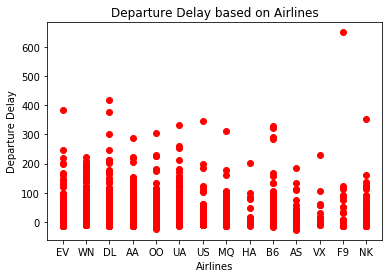

In [16]:
plt.scatter(flight1.AIRLINE, flight1.DEPARTURE_DELAY, color = "r")
plt.xlabel("Airlines")
plt.ylabel("Departure Delay")
plt.title('Departure Delay based on Airlines')
plt.show()

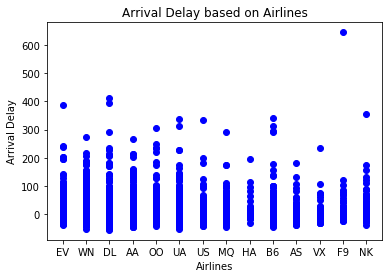

In [17]:
plt.scatter(flight1.AIRLINE, flight1.ARRIVAL_DELAY, color = "b")
plt.xlabel("Airlines")
plt.ylabel("Arrival Delay")
plt.title('Arrival Delay based on Airlines')
plt.show()

They show a similar trend. Because normally departure delay may cause an arrival delay. 

Now calculate the 5 number summary (min, Q1, median, Q3, max) of departure delay
for each airline. Arrange it by median delay (descending order). Do the same for
arrival delay.

In [18]:
#get the 5 number summary based on airlines
departure=flight1.groupby(["AIRLINE"])["DEPARTURE_DELAY"].describe()
#then sort it with descending order
departure.sort_values(by=["50%"],ascending = False)

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
UA,506.0,13.851779,36.681986,-12.0,-3.0,1.5,14.00,332.0
WN,1269.0,9.894405,27.341367,-10.0,-3.0,0.0,10.00,224.0
B6,257.0,13.645914,46.389097,-18.0,-5.0,-1.0,11.00,330.0
VX,64.0,8.593750,34.744290,-9.0,-4.0,-1.5,3.25,230.0
AA,710.0,8.349296,30.459003,-14.0,-5.0,-2.0,7.00,289.0
DL,918.0,7.238562,34.677903,-14.0,-4.0,-2.0,3.00,419.0
NK,118.0,15.228814,46.313944,-14.0,-6.0,-2.0,20.00,353.0
EV,546.0,7.461538,34.502804,-15.0,-6.0,-3.0,4.00,382.0
HA,57.0,7.964912,35.863812,-12.0,-6.0,-3.0,1.00,202.0


In [19]:
#get the 5 number summary based on airlines
arrival=flight1.groupby(["AIRLINE"])["ARRIVAL_DELAY"].describe()
#then sort it with descending order
arrival.sort_values(by=["50%"],ascending = False)

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
F9,73.0,19.150685,79.915871,-25.0,-9.00,1.0,15.00,644.0
HA,57.0,10.894737,35.940270,-29.0,-5.00,-1.0,10.00,194.0
NK,118.0,14.881356,48.874017,-36.0,-10.75,-2.0,23.00,354.0
OO,575.0,4.269565,34.220926,-42.0,-12.00,-3.0,8.00,304.0
EV,546.0,5.686813,38.006794,-36.0,-12.00,-4.0,8.00,386.0
US,206.0,5.067961,38.179362,-42.0,-13.00,-4.0,11.00,334.0
WN,1269.0,3.422380,29.851626,-53.0,-12.00,-4.0,8.00,273.0
B6,257.0,9.653696,50.608646,-45.0,-15.00,-5.0,14.00,339.0
UA,506.0,4.693676,39.317281,-53.0,-15.00,-5.5,10.00,337.0


Which airport has the most averaged departure delay? Give me the top 10 airports.
Why do you think the number 1 airport has that much delay?

In [20]:
#do the same thing with airport
departure1=flight1.groupby(["ORIGIN_AIRPORT"])["DEPARTURE_DELAY"].describe()
departure1.sort_values(by=["mean"],ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
ORIGIN_AIRPORT,,,,,,,,
FAR,1.0,161.000000,NaN,161.0,161.00,161.0,161.00,161.0
12898,1.0,119.000000,NaN,119.0,119.00,119.0,119.00,119.0
BMI,3.0,101.333333,181.582855,-5.0,-3.50,-2.0,154.50,311.0
ERI,1.0,92.000000,NaN,92.0,92.00,92.0,92.00,92.0
MYR,4.0,88.000000,176.769153,-6.0,-3.75,2.5,94.25,353.0
14576,1.0,88.000000,NaN,88.0,88.00,88.0,88.00,88.0
14696,1.0,88.000000,NaN,88.0,88.00,88.0,88.00,88.0
10157,2.0,87.500000,127.986327,-3.0,42.25,87.5,132.75,178.0
12992,1.0,80.000000,NaN,80.0,80.00,80.0,80.00,80.0


I think it may because the sample size is quite small. So one delay may influence the averaged delayed of this airport. 

Do you expect the departure delay has anything to do with distance of trip? What
about arrival delay and distance? Prove your claims.

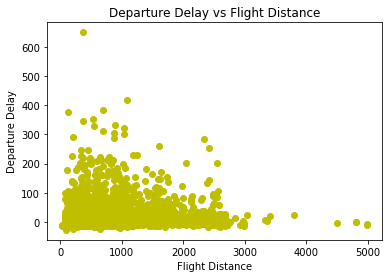

In [21]:
#draw a scatter plot of the relation between distance and departure delay
plt.scatter(flight1.DISTANCE, flight1.DEPARTURE_DELAY, color = "y")
plt.xlabel("Flight Distance")
plt.ylabel("Departure Delay")
plt.title('Departure Delay vs Flight Distance')
plt.show()

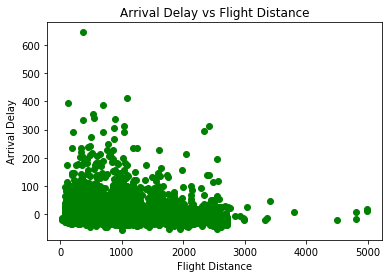

In [22]:
plt.scatter(flight1.DISTANCE, flight1.ARRIVAL_DELAY, color = "g")
plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay")
plt.title('Arrival Delay vs Flight Distance')
plt.show()

There is a negative relationship between delay and distance.

What about day of week vs departure delay?

In [23]:
#group by day 1 to day 7
departure2=flight1.groupby(["DAY_OF_WEEK"])["DEPARTURE_DELAY"].mean()
departure2

DAY_OF_WEEK
1    9.786826
2    8.995006
3    7.488971
4    9.390443
5    9.661148
6    7.125894
7    9.385965
Name: DEPARTURE_DELAY, dtype: float64

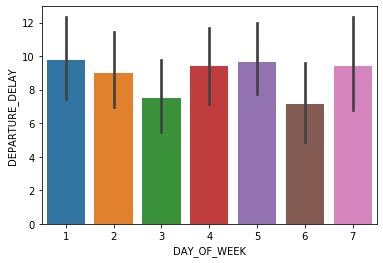

In [24]:
#create a bar chart
#want to use mean, so we need to import mean from numpy
from numpy import mean
ax = sns.barplot(x="DAY_OF_WEEK", y="DEPARTURE_DELAY", data=flight1, estimator=mean)
#black: error bars

If there is a departure delay (i.e. positive values for departure delay), does distance
have anything to do with arrival delay? Explain. (My experience has been that longer
distance flights can make up more time.)

In [25]:
#filter the data with departure delay > 0
departure3=flight1[flight1["DEPARTURE_DELAY"]>0]

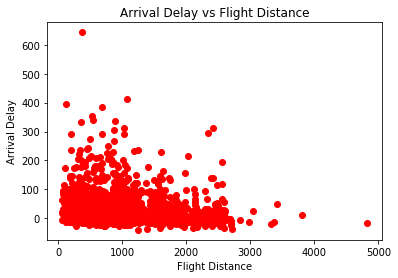

In [26]:
plt.scatter(departure3.DISTANCE, departure3.ARRIVAL_DELAY, color = "r")
plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay")
plt.title('Arrival Delay vs Flight Distance')
plt.show()

Come up with two interesting questions that you want to answer, then explore it in
using this data set. Use any numerical or graphical methods to support your answers
(preferably both).

In [27]:
#try to figure out the influence by month
flight1.groupby(["MONTH"])["DEPARTURE_DELAY"].describe()

,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
1,413.0,7.532688,31.970663,-18.0,-5.00,-1.0,8.00,378.0
2,396.0,9.603535,33.594935,-15.0,-5.00,-1.0,8.00,303.0
3,517.0,12.353965,42.004711,-16.0,-4.00,-1.0,12.00,419.0
4,507.0,7.252465,30.419715,-23.0,-5.00,-2.0,7.00,345.0
5,454.0,10.544053,33.058468,-15.0,-5.00,-1.0,9.75,212.0
6,537.0,11.832402,36.208427,-14.0,-4.00,-1.0,10.00,322.0
7,504.0,12.644841,42.234210,-18.0,-4.00,0.0,13.00,650.0
8,492.0,10.008130,39.760484,-18.0,-4.25,-1.0,7.00,353.0
9,474.0,4.854430,28.431772,-23.0,-6.00,-3.0,1.00,289.0


In [28]:
#departure in the morning 
flight1[(flight1["SCHEDULED_DEPARTURE"]>=500) & 
        (flight1["SCHEDULED_DEPARTURE"]<=1159)]["DEPARTURE_DELAY"].describe()

count    2333.000000
mean        5.381054
std        34.877267
min       -18.000000
25%        -5.000000
50%        -2.000000
75%         2.000000
max       650.000000
Name: DEPARTURE_DELAY, dtype: float64

In [29]:
#departure in the afternoon 
flight1[(flight1["SCHEDULED_DEPARTURE"]>=1200) & 
       (flight1["SCHEDULED_DEPARTURE"]<=1659)]["DEPARTURE_DELAY"].describe()

count    1743.000000
mean        9.507172
std        31.935854
min       -23.000000
25%        -4.000000
50%        -1.000000
75%         8.000000
max       332.000000
Name: DEPARTURE_DELAY, dtype: float64

In [30]:
#departure in the evening
flight1[((flight1["SCHEDULED_DEPARTURE"]>=1700) & 
       (flight1["SCHEDULED_DEPARTURE"]<=2359)) | 
       (flight1["SCHEDULED_DEPARTURE"]<=499)]["DEPARTURE_DELAY"].describe()

count    1637.000000
mean       13.221747
std        35.070768
min       -27.000000
25%        -4.000000
50%         0.000000
75%        16.000000
max       322.000000
Name: DEPARTURE_DELAY, dtype: float64

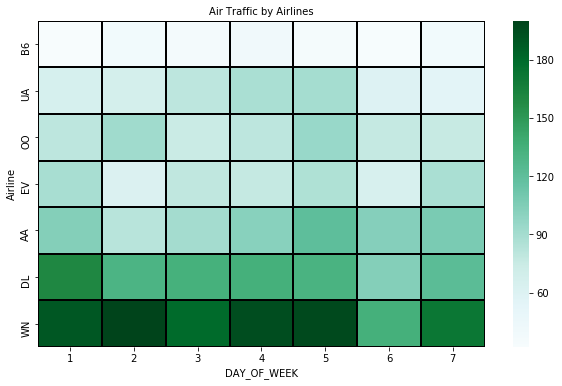

In [31]:
#try to figure out which airline has the most traffic
flight_valume=flight1.pivot_table(index='AIRLINE',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
figure=flight_valume.sort_values(by=1,ascending=False)[:7]
figure=figure.iloc[::-1]
fig = plt.figure(figsize=(10,6))
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
sns.heatmap(figure, cmap='BuGn', linecolor='black', linewidths=1)
plt.title('Air Traffic by Airlines',size=10)
plt.ylabel('Airline',size=10)
plt.xticks()
plt.show()

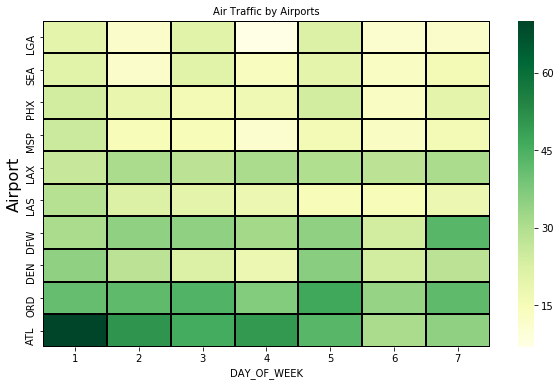

In [32]:
#do the same things for the airport
flight_valume=flight1.pivot_table(index='ORIGIN_AIRPORT',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
figure=flight_valume.sort_values(by=1,ascending=False)[:10]
figure=figure.iloc[::-1]
fig = plt.figure(figsize=(10,6))
sns.heatmap(figure, cmap='YlGn', linecolor='black', linewidths=1)
plt.title('Air Traffic by Airports',size=10)
plt.ylabel('Airport',size=16)
plt.xticks()
plt.show()

In [54]:
#add a new column called delay difference
flight1['Delay_Difference'] = flight1['DEPARTURE_DELAY'] - flight1['ARRIVAL_DELAY']
flight1.groupby(["AIRLINE"])["Delay_Difference"].mean().sort_values(by='Delay_Difference', ascending=False)
#departure.sort_values(by=["50%"],ascending = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AIRLINE
AA    5.542254
AS    3.082759
B6    3.992218
DL    7.103486
EV    1.774725
F9   -4.315068
HA   -2.929825
MQ    4.208178
NK    0.347458
OO    1.433043
UA    9.158103
US    2.325243
VX    3.828125
WN    6.472025
Name: Delay_Difference, dtype: float64

## 2) regression Analysis

### Subpart I

Your response is ARRIVAL_DELAY. First, remove all the missing data in the
WEATHER_DELAY column. Once you do this, there shouldn't be anymore missing values in
the data set(except for the cancellation reason feature). Check that.

In [33]:
#drop the null value in weather delay
flight2=flights.dropna(subset=["WEATHER_DELAY"])
flight2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,...,1559.0,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,...,1835.0,23.0,0,0,NaN,23.0,0.0,0.0,0.0,0.0
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,...,1324.0,21.0,0,0,NaN,13.0,0.0,8.0,0.0,0.0
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,...,1630.0,81.0,0,0,NaN,31.0,0.0,0.0,50.0,0.0
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,...,1734.0,114.0,0,0,NaN,0.0,0.0,25.0,89.0,0.0


In [34]:
#check if it meet the requirement
pd.isnull(flight2).sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

Build a regression model using all the observations, and the following predictors:
[LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, AIR_SYSTEM_DELAY,
WEATHER_DELAY, DAY_OF_WEEK, DEPARTURE_TIME,
DEPARTURE_DELAY, DISTANCE, AIRLINE]
a total of 9 predictors. Notice the AIRLINE variable is a categorical variable.

In [35]:
import statsmodels.formula.api as smf
#Model fitting
model = smf.ols(formula='ARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + AIR_SYSTEM_DELAY + WEATHER_DELAY + DAY_OF_WEEK + DEPARTURE_TIME + DEPARTURE_DELAY + DISTANCE + AIRLINE',data=flight2)
results=model.fit()
results.summary()
#print(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.292e+04
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:59:30   Log-Likelihood:                -2143.1
No. Observations:                1072   AIC:                             4330.
Df Residuals:                    1050   BIC:                             4440.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5515      0.287      1.920      0.055      -0.012       1.115
AIRLINE[T.AS]           1.8508      0.432      4.282      0.000       1.003       2.699
AIRLINE[T.B6]          -0.0082      0.276     -0.030      0.976      -0.549       0.533
AIRLINE[T.DL]          -0.2441      0.224     -1.090      0.276      -0.683       0.195
AIRLINE[T.EV]          -0.1395      0.241     -0.579      0.563      -0.612       0.333
AIRLINE[T.F9]          -0.0320      0.444     -0.072      0.943      -0.904       0.840
AIRLINE[T.HA]          -0.1580      0.547     -0.289      0.773      -1.230       0.914
AIRLINE[T.MQ]          -0.1346      0.294     -0.457      0.648      -0.712       0.443
AIRLINE[T.NK]           0.4646      0.331      1.402      0.161      -0.186       1.115
AIRLINE[T.OO]          -0.1250      0.240     -0.520      0.603      -0.596       0.346
AIRLINE[T.UA]          -0.3681      0.233     -1.581      0.114      -0.825       0.089
AIRLINE[T.US]          -0.1911      0.319     -0.600      0.549      -0.816       0.434
AIRLINE[T.VX]          -0.0841      0.544     -0.155      0.877      -1.152       0.984
AIRLINE[T.WN]          -0.1901      0.198     -0.959      0.338      -0.579       0.199
LATE_AIRCRAFT_DELAY     0.9812      0.004    251.863      0.000       0.974       0.989
AIRLINE_DELAY           0.9819      0.004    258.890      0.000       0.974       0.989
AIR_SYSTEM_DELAY        0.9851      0.003    312.534      0.000       0.979       0.991
WEATHER_DELAY           0.9842      0.004    239.704      0.000       0.976       0.992
DAY_OF_WEEK            -0.0320      0.028     -1.127      0.260      -0.088       0.024
DEPARTURE_TIME         -0.0001      0.000     -0.909      0.364      -0.000       0.000
DEPARTURE_DELAY         0.0160      0.003      4.697      0.000       0.009       0.023
DISTANCE                0.0001      0.000      1.078      0.281   -9.01e-05       0.000
==============================================================================
Omnibus:                     2222.999   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4344520.011
Skew:                          16.618   Prob(JB):                         0.00
Kurtosis:                     313.098   Cond. No.                     2.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#AIRLINE_Dummy = pd.get_dummies(flight2['AIRLINE'])
#X = flight2[['LATE_AIRCRAFT_DELAY' , 'AIRLINE_DELAY' , 'AIR_SYSTEM_DELAY' , 'WEATHER_DELAY' , 
             #'DAY_OF_WEEK' , 'DEPARTURE_TIME' , 'DEPARTURE_DELAY' , 'DISTANCE']]
#y = flight2['ARRIVAL_DELAY']
#X_int = sm.add_constant(X) #Add the intercept column, can be skipped if we don't want intercept, 
                           #but columns are assumed to be centered
#linreg1 = sm.OLS(y,X_int).fit() #Notice the order of input
#linreg1.summary()

In [37]:
#flight3 = pd.concat([flight2, AIRLINE_Dummy], axis=1)
#flight3

Perform model diagnostics. What do you observe? Explain.

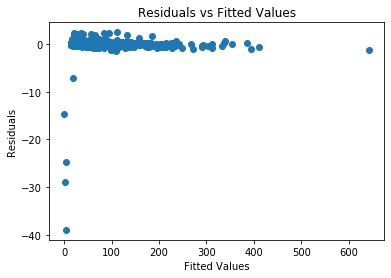

In [38]:
#Residual vs fitted value plot (homo)
predictedValues = results.predict()
residuals = predictedValues - flight2['ARRIVAL_DELAY']
plt.scatter(predictedValues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

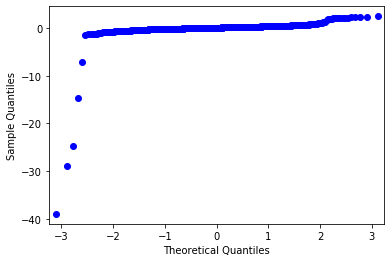

In [39]:
#QQ Plot (normal probility)
fig = sm.qqplot(residuals) 

In [40]:
#1. Linearity.
#2. Homoscedasticity (constant variance).
#3. Independence of error terms.(timeseries)
#4. Normality of error terms.
#The first three assumptions can be checked using a residual vs fitted values plot, 
#while the last one can be checked using a QQ-Plot.

Provide interpretations for a few of the coeffcients, and comment on whether they
make sense.

because of the outliers, the model may not show 

### Subpart II

Removing outliers: _first is to remove outliers. Using the boxplot method, remove the
outliers in the ARRIVAL_DELAY variable.

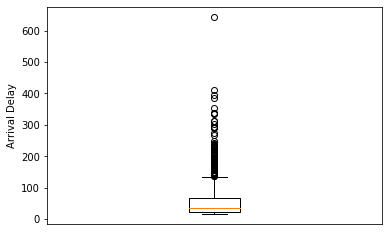

In [41]:
#create a boxplot of Arrival_delay
plt.boxplot([flight2['ARRIVAL_DELAY']])
plt.xticks([])
plt.ylabel('Arrival Delay')
plt.show()

In [42]:
# Then, find IQR
Q1 = np.percentile(flight2.ARRIVAL_DELAY, 25,  interpolation = 'midpoint')  #This is the 1st quartile
Q3 = np.percentile(flight2.ARRIVAL_DELAY, 75,  interpolation = 'midpoint') 
IQR = Q3 - Q1
print(IQR)

45.5


In [43]:
# Using IQR to drop the outliers
flight2.drop(flight2[(flight2['ARRIVAL_DELAY'] > (Q3 + 1.5*IQR)) | (flight2['ARRIVAL_DELAY'] < (Q1 - 1.5*IQR))].index, inplace = True)
len(flight2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


986

Refit the linear regression model, but now with log(ARRIVAL_DELAY) as your response.
Also, remove the nonsignificant predictors from the previous model (with
p-values larger than 0.05) and the AIRLINE variable. (Remember that when removing
nonsignificant predictors one can only eliminate one variable per step.)

In [44]:
# Create a log(ARRIVAL_DELAY)
flight2['LogARRIVAL_DELAY'] = np.log(flight2['ARRIVAL_DELAY']+1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
flight2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LogARRIVAL_DELAY
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,...,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0,3.610918
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,...,23.0,0,0,NaN,23.0,0.0,0.0,0.0,0.0,3.178054
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,...,21.0,0,0,NaN,13.0,0.0,8.0,0.0,0.0,3.091042
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,...,81.0,0,0,NaN,31.0,0.0,0.0,50.0,0.0,4.406719
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,...,114.0,0,0,NaN,0.0,0.0,25.0,89.0,0.0,4.744932


In [46]:
model = smf.ols(formula='LogARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + AIR_SYSTEM_DELAY + WEATHER_DELAY + DAY_OF_WEEK + DEPARTURE_TIME + DEPARTURE_DELAY + DISTANCE',data=flight2)
result1=model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogARRIVAL_DELAY   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1416.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:59:31   Log-Likelihood:                 392.52
No. Observations:                 986   AIC:                            -767.0
Df Residuals:                     977   BIC:                            -723.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7440      0.023    119.890      0.000       2.699       2.789
LATE_AIRCRAFT_DELAY     0.0187      0.000     41.127      0.000       0.018       0.020
AIRLINE_DELAY           0.0189      0.000     40.017      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0198      0.000     59.876      0.000       0.019       0.020
WEATHER_DELAY           0.0190      0.001     28.694      0.000       0.018       0.020
DAY_OF_WEEK             0.0012      0.003      0.458      0.647      -0.004       0.006
DEPARTURE_TIME       9.962e-06   1.12e-05      0.886      0.376   -1.21e-05     3.2e-05
DEPARTURE_DELAY         0.0008      0.000      2.118      0.034    5.73e-05       0.002
DISTANCE            -2.238e-06   8.55e-06     -0.262      0.794    -1.9e-05    1.45e-05
==============================================================================
Omnibus:                       37.795   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.604
Skew:                          -0.328   Prob(JB):                     1.88e-13
Kurtosis:                       3.998   Cond. No.                     7.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#remove distance
model = smf.ols(formula='LogARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + AIR_SYSTEM_DELAY + WEATHER_DELAY + DAY_OF_WEEK + DEPARTURE_TIME + DEPARTURE_DELAY',data=flight2)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogARRIVAL_DELAY   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1619.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:59:32   Log-Likelihood:                 392.48
No. Observations:                 986   AIC:                            -769.0
Df Residuals:                     978   BIC:                            -729.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7419      0.021    127.824      0.000       2.700       2.784
LATE_AIRCRAFT_DELAY     0.0187      0.000     41.183      0.000       0.018       0.020
AIRLINE_DELAY           0.0189      0.000     40.035      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0198      0.000     59.906      0.000       0.019       0.020
WEATHER_DELAY           0.0190      0.001     28.719      0.000       0.018       0.020
DAY_OF_WEEK             0.0012      0.003      0.458      0.647      -0.004       0.006
DEPARTURE_TIME       1.009e-05   1.12e-05      0.899      0.369   -1.19e-05    3.21e-05
DEPARTURE_DELAY         0.0008      0.000      2.118      0.034    5.75e-05       0.002
==============================================================================
Omnibus:                       37.984   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.892
Skew:                          -0.330   Prob(JB):                     1.63e-13
Kurtosis:                       3.999   Cond. No.                     6.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#remove day of week
model = smf.ols(formula='LogARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + AIR_SYSTEM_DELAY + WEATHER_DELAY + DEPARTURE_TIME + DEPARTURE_DELAY',data=flight2)
result3=model.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogARRIVAL_DELAY   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1891.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:59:32   Log-Likelihood:                 392.38
No. Observations:                 986   AIC:                            -770.8
Df Residuals:                     979   BIC:                            -736.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7465      0.019    144.939      0.000       2.709       2.784
LATE_AIRCRAFT_DELAY     0.0187      0.000     41.202      0.000       0.018       0.020
AIRLINE_DELAY           0.0189      0.000     40.109      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0198      0.000     59.947      0.000       0.019       0.020
WEATHER_DELAY           0.0190      0.001     28.741      0.000       0.018       0.020
DEPARTURE_TIME       1.021e-05   1.12e-05      0.910      0.363   -1.18e-05    3.22e-05
DEPARTURE_DELAY         0.0008      0.000      2.109      0.035     5.4e-05       0.002
==============================================================================
Omnibus:                       38.076   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.241
Skew:                          -0.335   Prob(JB):                     2.25e-13
Kurtosis:                       3.984   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#remove departure time
model = smf.ols(formula='LogARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + AIR_SYSTEM_DELAY + WEATHER_DELAY + DEPARTURE_DELAY',data=flight2)
result4=model.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogARRIVAL_DELAY   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2269.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:59:32   Log-Likelihood:                 391.96
No. Observations:                 986   AIC:                            -771.9
Df Residuals:                     980   BIC:                            -742.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7613      0.010    287.307      0.000       2.742       2.780
LATE_AIRCRAFT_DELAY     0.0186      0.000     41.198      0.000       0.018       0.020
AIRLINE_DELAY           0.0188      0.000     40.344      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0198      0.000     60.354      0.000       0.019       0.020
WEATHER_DELAY           0.0190      0.001     28.730      0.000       0.018       0.020
DEPARTURE_DELAY         0.0008      0.000      2.283      0.023       0.000       0.002
==============================================================================
Omnibus:                       37.990   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.372
Skew:                          -0.344   Prob(JB):                     5.74e-13
Kurtosis:                       3.948   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""